In [2]:
# 0. Import package

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# 1. Data collection

print("SPX-Data collected from yahoo finance!, BTC-index, monthly data.")
print("CPI-Data collected from trading view, USCPI-index, monthly data.")


BTC-Data collected from trading view, BTC-index, monthly data.
CPI-Data collected from trading view, USCPI-index, monthly data.


         Date        Open        High         Low       Close   Adj Close  \
0  1985-01-01  167.199997  180.270004  163.360001  179.630005  179.630005   
1  1985-02-01  179.630005  183.949997  177.750000  181.179993  181.179993   
2  1985-03-01  181.179993  183.889999  176.529999  180.660004  180.660004   
3  1985-04-01  180.660004  183.610001  177.860001  179.830002  179.830002   
4  1985-05-01  179.830002  189.979996  178.350006  189.550003  189.550003   

       Volume  
0  2673710000  
1  2194620000  
2  2153090000  
3  1981880000  
4  2350340000  


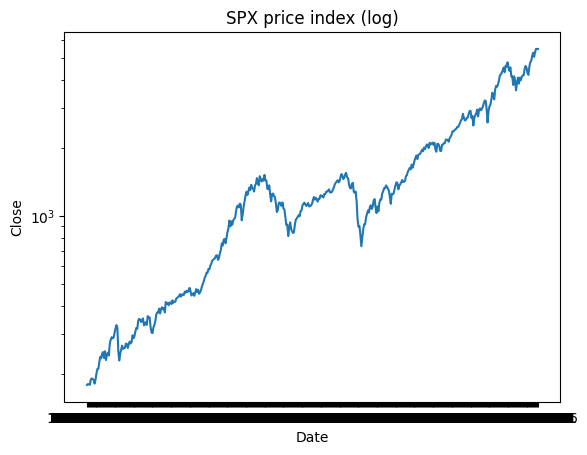

        time  close
0   1/7/1999  166.7
1   1/8/1999  167.1
2   1/9/1999  167.9
3  1/10/1999  168.2
4  1/11/1999  168.3


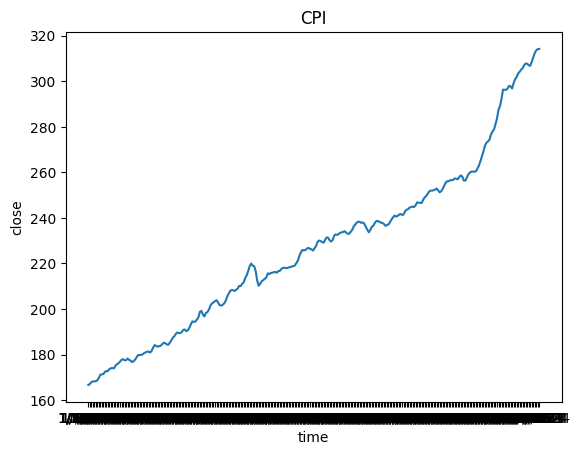

In [8]:
# 2. Data storage

# 2.1. Store BTC data
btc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/^SPX.csv')
print(btc.head())
btc_line = sns.lineplot(data = btc, x = 'Date', y = 'Close')
btc_line.set_yscale('log')
btc_line.set_title("SPX price index (log)")
plt.show()

#2.2. Store CPI data
cpi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ECONOMICS_USCPI, 1M.csv')
print(cpi.head())
cpi_line = sns.lineplot(data = cpi, x = 'time', y = 'close')
cpi_line.set_title("CPI")
plt.show()


In [11]:
# 3. Data cleaning

# 3.1 SPX price index is meaningless before 2000
def date_clean(df, col):
  clean = df
  clean[col] = pd.to_datetime(df[col])
  clean['year'] = clean[col].dt.year
  clean['month'] = clean[col].dt.month
  clean = clean[clean['year'] >= 2000]
  clean = clean.dropna()
  clean = clean.drop(col, axis = 1)
  clean = clean.reset_index()

  return clean

# 3.2 Clean up data for BTC
btc_clean = date_clean(btc, 'Date')

# 3.3 Clean up data for CPI
cpi_clean = date_clean(cpi, 'time')

# 3.4 Combine data
data = btc_clean[['year', 'month','Close']]
data['cpi'] = cpi_clean['close']
data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 293
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    294 non-null    int32  
 1   month   294 non-null    int32  
 2   Close   294 non-null    float64
 3   cpi     294 non-null    float64
dtypes: float64(2), int32(2)
memory usage: 9.2 KB


<ipython-input-11-8579a97bffb0>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cpi'] = cpi_clean['close']


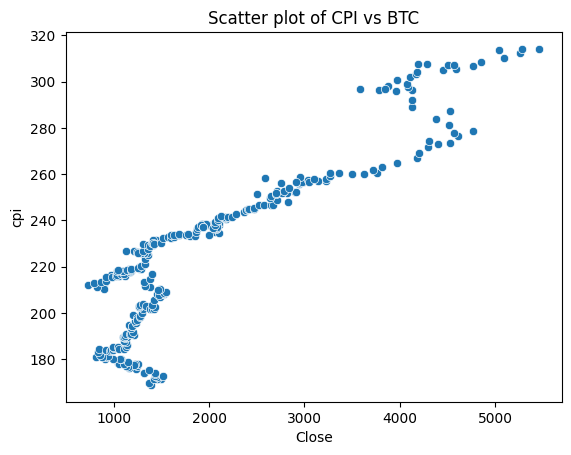

             Close       cpi   dummy_1   dummy_2   dummy_3   dummy_4  \
Close     1.000000  0.901858 -0.000017 -0.001318  0.005363  0.010048   
cpi       0.901858  1.000000 -0.018021 -0.009200  0.001329  0.008243   
dummy_1  -0.000017 -0.018021  1.000000 -0.092937 -0.092937 -0.092937   
dummy_2  -0.001318 -0.009200 -0.092937  1.000000 -0.092937 -0.092937   
dummy_3   0.005363  0.001329 -0.092937 -0.092937  1.000000 -0.092937   
dummy_4   0.010048  0.008243 -0.092937 -0.092937 -0.092937  1.000000   
dummy_5   0.013767  0.014620 -0.092937 -0.092937 -0.092937 -0.092937   
dummy_6   0.016082  0.020819 -0.092937 -0.092937 -0.092937 -0.092937   
dummy_7  -0.008963 -0.006316 -0.090890 -0.090890 -0.090890 -0.090890   
dummy_8  -0.008590 -0.003776 -0.090890 -0.090890 -0.090890 -0.090890   
dummy_9  -0.020432  0.000060 -0.090890 -0.090890 -0.090890 -0.090890   
dummy_10 -0.013261  0.000605 -0.090890 -0.090890 -0.090890 -0.090890   
dummy_11  0.001233 -0.002728 -0.090890 -0.090890 -0.090890 -0.09

In [13]:
# 4. Data analysis

# 4.1 Relationship between the variable
data_sca = sns.scatterplot(data = data, x = 'Close', y = 'cpi')
data_sca.set_title('Scatter plot of CPI vs BTC')
plt.show()

# 4.2 Examine dummy factor
def dummy(df, col):
  dummy = pd.get_dummies(df[col])
  dummy = dummy.astype('int')
  dummy = dummy.drop(dummy.columns[-1], axis = 1)
  dummy = dummy.rename(columns = lambda x: 'dummy_' + str(x))
  clean = pd.concat([df, dummy], axis = 1)
  clean = clean.drop(col, axis = 1)

  return clean

data_clean = dummy(data, 'month')

# 4.3 Examine correlation and remove high correlation
data_clean = data_clean.drop('year', axis = 1)
print(data_clean.corr())


The score of the model is:  99.0 %
The mean square of the model is:  10976.0
The root mean square of the model is:  105.0


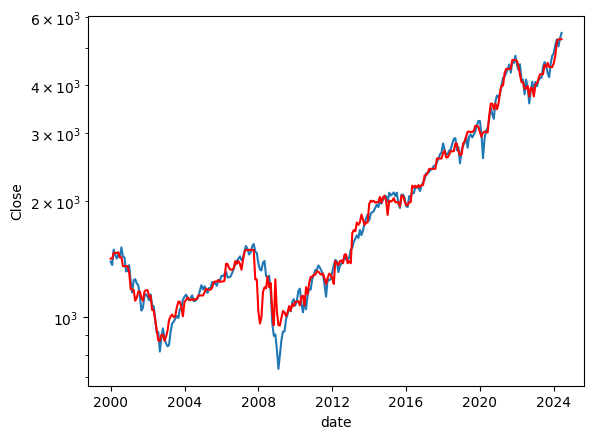

In [15]:
# 5. Machine learning

# 5.1 Seperate data
X = data_clean.drop(['Close'], axis = 1)
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 21)

# 5.2 Build up model (KNN)
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
predict = model.predict(X)
mse = mean_squared_error(predict, y)

print('The score of the model is: ', round(score * 100, 0), '%')
print('The mean square of the model is: ', round(mse, 0))
print('The root mean square of the model is: ', round(mse ** 0.5, 0))

data['date'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str) + '-01')
result = sns.lineplot(x = data['date'], y = y)
result = sns.lineplot(x = data['date'], y = predict, color = 'red')
result.set_yscale('log')
plt.show()

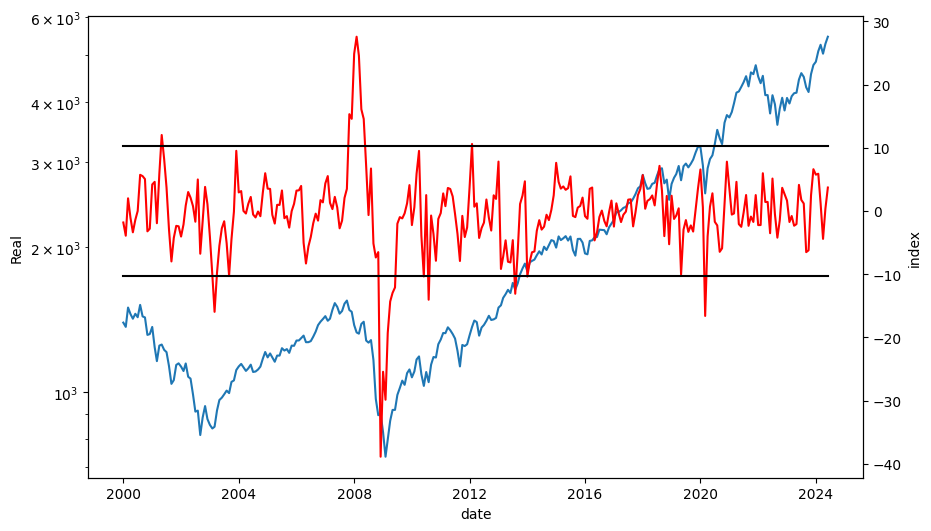

In [17]:
# 6. Machine learning production

# 6.1 Indicator dataframe
indicator = pd.DataFrame({
    'Predict': predict,
    'Real': y,
    'Error': y - predict
})

indicator['index'] = indicator['Error'] / indicator['Real'] * 100

# 6.2 Present the graph with bTC price
outlier = indicator['index'].mean() + indicator['index'].std() * 1.645

fig, ax1 = plt.subplots(figsize=(10, 6))

line1 = sns.lineplot(x = data['date'], y = indicator['Real'], ax=ax1)
line1.set_yscale('log')
ax1.tick_params(axis='y', colors='black')


ax2 = ax1.twinx()

sns.lineplot(x = data['date'], y = indicator['index'], color='red', ax=ax2)
sns.lineplot(x = data['date'], y = outlier, color='black', ax=ax2)
sns.lineplot(x = data['date'], y = -outlier, color='black', ax=ax2)
ax2.tick_params(axis='y', colors='black')

plt.show()
